In [ ]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import PIL 

In [ ]:
url = 'C:\\Users\\henri\\uvas\\uvas'
data_dir = pathlib.Path(url)

In [3]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [4]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [5]:
leafblight = list(data_dir.glob('LeafBlight/*'))

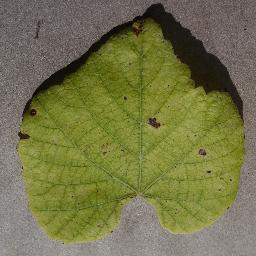

In [6]:
import PIL.Image


PIL.Image.open(str(leafblight[0]))

In [7]:
import numpy as np

In [8]:
for subfolder in subfolders:
    path = data_dir / subfolder
    imagens = list(path.glob('*.JPG'))
    print(f'Classe {subfolders} tem {len(imagens)} imagens')

    if imagens:
        img = PIL.Image.open(str(imagens[0]))
        img_array = np.array(img)
        print(f'Dimensoes da primeira magem em {subfolder}: {img_array.shape}')

Classe ['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight'] tem 400 imagens
Dimensoes da primeira magem em BlackMeasles: (256, 256, 3)
Classe ['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight'] tem 400 imagens
Dimensoes da primeira magem em BlackRot: (256, 256, 3)
Classe ['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight'] tem 400 imagens
Dimensoes da primeira magem em HealthyGrapes: (256, 256, 3)
Classe ['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight'] tem 400 imagens
Dimensoes da primeira magem em LeafBlight: (256, 256, 3)


In [9]:
batch_size = 64
altura = 256
largura = 256

In [10]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [11]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='validation',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [12]:
treino.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [13]:
tf.random.set_seed(424242)

In [14]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), #preciso passar o canais da imagem
    tf.keras.layers.Rescaling(1./255), #Rescalando os pixeis por 255 que é a quantidade, para escalar de 0 a 1
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'), #Camada convolucuinal, 32 filtros pela imagem(gerando 32 versoes da imagem) e 3 por 3 pixeis de tamanho
    tf.keras.layers.MaxPooling2D(2,2), #escolher os valores mais altos dos px da imagem, reduz a dimensionalidade da img
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #Achatando o tensor
    tf.keras.layers.Dense(128, activation = tf.nn.relu), #Oculta
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

In [15]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
epocs = 10
history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocs
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2817 - loss: 10.3935 - val_accuracy: 0.3938 - val_loss: 1.1444
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 867ms/step - accuracy: 0.5529 - loss: 0.9389 - val_accuracy: 0.8562 - val_loss: 0.3985
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 845ms/step - accuracy: 0.8820 - loss: 0.3420 - val_accuracy: 0.9156 - val_loss: 0.2722
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 818ms/step - accuracy: 0.9355 - loss: 0.1790 - val_accuracy: 0.8875 - val_loss: 0.2952
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 862ms/step - accuracy: 0.9624 - loss: 0.1114 - val_accuracy: 0.9219 - val_loss: 0.2074
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 886ms/step - accuracy: 0.9735 - loss: 0.0806 - val_accuracy: 0.9375 - val_loss: 0.2167
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 887ms/step - accuracy: 0.9936 - loss: 0.0366 - val_accuracy: 0.9281 - val_loss: 0.1944
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 861ms/step - accuracy: 0.9884 - loss: 0.0340 - val_accura

In [17]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plota_resultados(history, epocs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    intervalo_epochs = range(epocs)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(intervalo_epochs, acc, 'r', label='Acuracia do Treino')
    plt.plot(intervalo_epochs, val_acc, 'b', label='Acurácia da Validacao')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)

    plt.plot(intervalo_epochs, loss , 'r', label='Perda do Treino')
    plt.plot(intervalo_epochs, val_loss , 'b', label='Perda da Validacao')
    plt.legend(loc='upper right')
    plt.show()

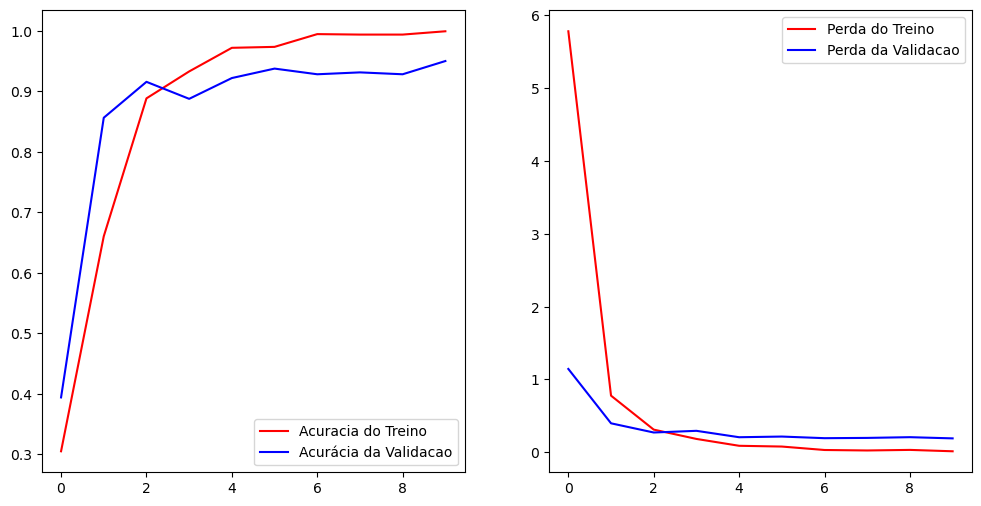

In [20]:
plota_resultados(history, epocs)

In [21]:
#Callback para parar quando a acuracia estiver alta
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>=0.93:
            print('\n Alcancamos 93% de acc, Parando o treinamento')
            self.model.stop_training = True
    
meu_calback = myCallback()

In [22]:
modelo2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), #preciso passar o canais da imagem
    tf.keras.layers.Rescaling(1./255), #Rescalando os pixeis por 255 que é a quantidade, para escalar de 0 a 1
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'), #Camada convolucuinal, 32 filtros pela imagem(gerando 32 versoes da imagem) e 3 por 3 pixeis de tamanho
    tf.keras.layers.MaxPooling2D(2,2), #escolher os valores mais altos dos px da imagem, reduz a dimensionalidade da img
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #Achatando o tensor
    tf.keras.layers.Dense(128, activation = tf.nn.relu), #Oculta
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

modelo2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
epocas = 10

history = modelo2.fit(
    treino,
    validation_data=validacao,
    epochs = epocas,
    callbacks =[meu_calback]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 911ms/step - accuracy: 0.2836 - loss: 2.8992 - val_accuracy: 0.7250 - val_loss: 0.8059
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 922ms/step - accuracy: 0.7509 - loss: 0.6448 - val_accuracy: 0.9031 - val_loss: 0.3053
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 955ms/step - accuracy: 0.9040 - loss: 0.2445 - val_accuracy: 0.9312 - val_loss: 0.2020
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.9513 - loss: 0.1506
 Alcancamos 93% de acc, Parando o treinamento
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 858ms/step - accuracy: 0.9516 - loss: 0.1502 - val_accuracy: 0.9187 - val_loss: 0.2160


In [24]:
#Adicionando variabilidade aos dados
data_aumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05)
])

In [25]:
modelo3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), #preciso passar o canais da imagem
    data_aumentation,
    tf.keras.layers.Rescaling(1./255), #Rescalando os pixeis por 255 que é a quantidade, para escalar de 0 a 1
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'), #Camada convolucuinal, 32 filtros pela imagem(gerando 32 versoes da imagem) e 3 por 3 pixeis de tamanho
    tf.keras.layers.MaxPooling2D(2,2), #escolher os valores mais altos dos px da imagem, reduz a dimensionalidade da img
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #Achatando o tensor
    tf.keras.layers.Dense(128, activation = tf.nn.relu), #Oculta
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

modelo3.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
epocas = 10

history = modelo2.fit(
    treino,
    validation_data=validacao,
    epochs = epocas
)

In [ ]:
modelo.save('modelo_apos_aumento.h5')

In [28]:
#Utilizando um modelo ja criado
input_shape = (256,256,3)

In [29]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [30]:
#Devemos nao permitir que este modelo seja treinado, pois ele ja foi treinado
modelo_base.trainable = False

In [31]:
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d_6[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [32]:
#Adptando o modelo importado ao nosso probela de folhas
#Começando pero reescaling
rescale = tf.keras.layers.Rescaling((1./255))
treino = treino.map(lambda x,y: (rescale(x,),y))
validacao = validacao.map(lambda x,y: (rescale(x,),y))


In [43]:
ultima_camada = modelo_base.get_layer('mixed7')
print('ultima camada', ultima_camada.output.shape)
ultima_saida = ultima_camada.output

ultima camada (None, 14, 14, 768)


A ultima camada do modelo importado vai fazer parte do modelo que vamos treinar para diferenciar as folhas

In [46]:
x = tf.keras.layers.Flatten()(ultima_saida)
#A partir daqui vamos apenas fazer append no x
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x) #Para garantir que nao haja overfiting
x = tf.keras.layers.Dense(4, activation = 'softmax')(x)

modelo = tf.keras.Model(inputs=modelo_base.input, outputs=x)
#O inicio do modelo é o que importei V3 e a saida é sao as camadas que criei para se adptar ao nosso problema

In [47]:
modelo.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d_6[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 154,145,796 (588.02 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [48]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [50]:
epocas = 20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.4236 - loss: 21.5911 - val_accuracy: 0.8500 - val_loss: 1.2643
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9451 - loss: 0.3983 - val_accuracy: 0.9656 - val_loss: 0.1251
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9772 - loss: 0.0970 - val_accuracy: 0.9750 - val_loss: 0.0924
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9915 - loss: 0.0305 - val_accuracy: 0.9875 - val_loss: 0.0692
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9937 - val_loss: 0.0603
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9906 - val_loss: 0.0557
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9844 - val_loss: 0.0667
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9971 - loss: 0.0063 - val_accuracy: 0.9906 - val_loss

In [52]:
#Salvando o novo modelo de uma forma que economize espaco
#Este modo se chama quantizacao ele reduz a casa decimal dos pesos
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.target_spec.supported_types = [tf.float16]
modelo_tflite_quantizado = converter.convert()

with open('modelo_quantizado16bits.tflite', 'wb') as f:
    f.write(modelo_tflite_quantizado)

INFO:tensorflow:Assets written to: C:\Users\henri\AppData\Local\Temp\tmpsci6bx3e\assets


INFO:tensorflow:Assets written to: C:\Users\henri\AppData\Local\Temp\tmpsci6bx3e\assets


Saved artifact at 'C:\Users\henri\AppData\Local\Temp\tmpsci6bx3e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_32')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2208665503696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665502352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665504848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665504464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665504272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665505424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665506384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665506192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665505040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2208665506960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  22